<a href="https://colab.research.google.com/github/swatigawale/project-1/blob/main/incident_impact_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('incident_event_log.csv')
df

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,INC0120835,Closed,False,1,0,4,True,Caller 116,Opened by 12,16/2/2017 09:09,...,True,Do Not Notify,?,?,?,?,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53
141708,INC0121064,Active,True,0,0,0,True,Caller 116,Opened by 12,16/2/2017 14:17,...,False,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141709,INC0121064,Active,True,1,0,1,True,Caller 116,Opened by 12,16/2/2017 14:17,...,False,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141710,INC0121064,Resolved,True,1,0,2,True,Caller 116,Opened by 12,16/2/2017 14:17,...,True,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38


# Exploratory Data Analysis

In [ ]:
pip install sweetviz

In [ ]:
import pandas_profiling as pp
import sweetviz as sv

In [ ]:
df.tail(10)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
141702,INC0120495,Awaiting User Info,True,1,0,4,True,Caller 323,Opened by 14,15/2/2017 11:58,...,False,Do Not Notify,?,?,?,?,?,?,?,16/2/2017 09:51
141703,INC0120495,Closed,False,1,0,5,True,Caller 323,Opened by 14,15/2/2017 11:58,...,False,Do Not Notify,?,?,?,?,?,?,?,16/2/2017 09:51
141704,INC0120835,Active,True,0,0,0,True,Caller 116,Opened by 12,16/2/2017 09:09,...,False,Do Not Notify,?,?,?,?,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53
141705,INC0120835,Active,True,1,0,1,True,Caller 116,Opened by 12,16/2/2017 09:09,...,False,Do Not Notify,?,?,?,?,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53
141706,INC0120835,Resolved,True,1,0,3,True,Caller 116,Opened by 12,16/2/2017 09:09,...,True,Do Not Notify,?,?,?,?,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53
141707,INC0120835,Closed,False,1,0,4,True,Caller 116,Opened by 12,16/2/2017 09:09,...,True,Do Not Notify,?,?,?,?,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53
141708,INC0121064,Active,True,0,0,0,True,Caller 116,Opened by 12,16/2/2017 14:17,...,False,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141709,INC0121064,Active,True,1,0,1,True,Caller 116,Opened by 12,16/2/2017 14:17,...,False,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141710,INC0121064,Resolved,True,1,0,2,True,Caller 116,Opened by 12,16/2/2017 14:17,...,True,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141711,INC0121064,Closed,False,1,0,3,True,Caller 116,Opened by 12,16/2/2017 14:17,...,True,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38


In [ ]:
#Data Structure
type(df)
df.shape

(141712, 36)

In [ ]:
df.dtypes

number                     object
incident_state             object
active                       bool
reassignment_count          int64
reopen_count                int64
sys_mod_count               int64
made_sla                     bool
caller_id                  object
opened_by                  object
opened_at                  object
sys_created_by             object
sys_created_at             object
sys_updated_by             object
sys_updated_at             object
contact_type               object
location                   object
category                   object
subcategory                object
u_symptom                  object
cmdb_ci                    object
impact                     object
urgency                    object
priority                   object
assignment_group           object
assigned_to                object
knowledge                    bool
u_priority_confirmation      bool
notify                     object
problem_id                 object
rfc           

# Data Type Conversion

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

In [ ]:
df1 = df.iloc[:,0:]
df1

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,INC0120835,Closed,False,1,0,4,True,Caller 116,Opened by 12,16/2/2017 09:09,...,True,Do Not Notify,?,?,?,?,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53
141708,INC0121064,Active,True,0,0,0,True,Caller 116,Opened by 12,16/2/2017 14:17,...,False,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141709,INC0121064,Active,True,1,0,1,True,Caller 116,Opened by 12,16/2/2017 14:17,...,False,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141710,INC0121064,Resolved,True,1,0,2,True,Caller 116,Opened by 12,16/2/2017 14:17,...,True,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38


In [ ]:
data = df1.copy()

In [ ]:
data

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,INC0120835,Closed,False,1,0,4,True,Caller 116,Opened by 12,16/2/2017 09:09,...,True,Do Not Notify,?,?,?,?,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53
141708,INC0121064,Active,True,0,0,0,True,Caller 116,Opened by 12,16/2/2017 14:17,...,False,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141709,INC0121064,Active,True,1,0,1,True,Caller 116,Opened by 12,16/2/2017 14:17,...,False,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141710,INC0121064,Resolved,True,1,0,2,True,Caller 116,Opened by 12,16/2/2017 14:17,...,True,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38


# Replacing the '?' with NAN

In [ ]:
data.replace('?', np.nan, inplace=True)

In [ ]:
data.isnull().sum()

number                          0
incident_state                  0
active                          0
reassignment_count              0
reopen_count                    0
sys_mod_count                   0
made_sla                        0
caller_id                      29
opened_by                    4835
opened_at                       0
sys_created_by              53076
sys_created_at              53076
sys_updated_by                  0
sys_updated_at                  0
contact_type                    0
location                       76
category                       78
subcategory                   111
u_symptom                   32964
cmdb_ci                    141267
impact                          0
urgency                         0
priority                        0
assignment_group            14213
assigned_to                 27496
knowledge                       0
u_priority_confirmation         0
notify                          0
problem_id                 139417
rfc           

In [ ]:
data.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


# Changing the datatypes for opened_at & closed_at columns

In [ ]:
columns_to_change_to_datetime = ['closed_at', 'opened_at' ]

for i in columns_to_change_to_datetime:
    data[i] = data[i].astype('datetime64[ns]')

In [ ]:
data.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,2016-05-03 12:00:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,2016-05-03 12:00:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,2016-05-03 12:00:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,2016-05-03 12:00:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,2016-02-29 04:40:00,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 81,1/3/2016 09:52,2016-06-03 10:00:00


In [ ]:
data.dtypes

number                             object
incident_state                     object
active                               bool
reassignment_count                  int64
reopen_count                        int64
sys_mod_count                       int64
made_sla                             bool
caller_id                          object
opened_by                          object
opened_at                  datetime64[ns]
sys_created_by                     object
sys_created_at                     object
sys_updated_by                     object
sys_updated_at                     object
contact_type                       object
location                           object
category                           object
subcategory                        object
u_symptom                          object
cmdb_ci                            object
impact                             object
urgency                            object
priority                           object
assignment_group                  

In [ ]:
print('percentage of missing values'.upper())
data.isnull().sum()/data.shape[0]*100

PERCENTAGE OF MISSING VALUES


number                      0.000000
incident_state              0.000000
active                      0.000000
reassignment_count          0.000000
reopen_count                0.000000
sys_mod_count               0.000000
made_sla                    0.000000
caller_id                   0.020464
opened_by                   3.411849
opened_at                   0.000000
sys_created_by             37.453427
sys_created_at             37.453427
sys_updated_by              0.000000
sys_updated_at              0.000000
contact_type                0.000000
location                    0.053630
category                    0.055041
subcategory                 0.078328
u_symptom                  23.261262
cmdb_ci                    99.685983
impact                      0.000000
urgency                     0.000000
priority                    0.000000
assignment_group           10.029496
assigned_to                19.402732
knowledge                   0.000000
u_priority_confirmation     0.000000
n

# Dropping columns with more than 90% missing values

In [ ]:
data1 = data.drop(['problem_id','rfc','vendor','caused_by','cmdb_ci'],axis=1)

In [ ]:

data1.shape

(141712, 31)

In [ ]:
data1.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,2016-05-03 12:00:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,2016-05-03 12:00:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,2016-05-03 12:00:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,2016-05-03 12:00:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,2016-02-29 04:40:00,...,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,code 5,Resolved by 81,1/3/2016 09:52,2016-06-03 10:00:00


# Filling the NAN

In [ ]:
data1.isnull().sum()

number                         0
incident_state                 0
active                         0
reassignment_count             0
reopen_count                   0
sys_mod_count                  0
made_sla                       0
caller_id                     29
opened_by                   4835
opened_at                      0
sys_created_by             53076
sys_created_at             53076
sys_updated_by                 0
sys_updated_at                 0
contact_type                   0
location                      76
category                      78
subcategory                  111
u_symptom                  32964
impact                         0
urgency                        0
priority                       0
assignment_group           14213
assigned_to                27496
knowledge                      0
u_priority_confirmation        0
notify                         0
closed_code                  714
resolved_by                  226
resolved_at                 3141
closed_at 

In [ ]:
# creating a neww class for missing values  for caller id
data1['caller_id'].fillna(value='caller 4340',inplace=True)

# creating a neww class for missing values for opened by
data1['opened_by'].fillna(value = 'Opened by 4341', inplace=True)

# creating a neww class for missing values for sys created by
data1['sys_created_by'].fillna(value='Created by 4342', inplace=True)

# creating a neww class for missing values for location
data1['location'].fillna('Location 4343', inplace=True)

# creating a neww class for missing values for category
data1['category'].fillna('Category 4344',inplace=True)

# creating a neww class for missing values for subcategory
data1['subcategory'].fillna(value='Subcategory 4345',inplace=True)

# creating a neww class for missing values for symptoms
data1['u_symptom'].fillna(value='Symptom 4346', inplace=True)

# creating a neww class for missing values for assignment group
data1['assignment_group'].fillna(value='Group 4347',inplace=True)

# creating a neww class for missing values for resolver
data1['assigned_to'].fillna(value='Resolver 4348',inplace=True)


# replacing with mode
data1['closed_code'].fillna(data1['closed_code'].mode()[0],inplace=True)
data1['resolved_by'].fillna(data1['resolved_by'].mode()[0],inplace=True)

In [ ]:
data1.isnull().sum()

number                         0
incident_state                 0
active                         0
reassignment_count             0
reopen_count                   0
sys_mod_count                  0
made_sla                       0
caller_id                      0
opened_by                      0
opened_at                      0
sys_created_by                 0
sys_created_at             53076
sys_updated_by                 0
sys_updated_at                 0
contact_type                   0
location                       0
category                       0
subcategory                    0
u_symptom                      0
impact                         0
urgency                        0
priority                       0
assignment_group               0
assigned_to                    0
knowledge                      0
u_priority_confirmation        0
notify                         0
closed_code                    0
resolved_by                    0
resolved_at                 3141
closed_at 

# Dropping Columns with missing data

In [ ]:
data2 = data1.drop(['sys_created_at','resolved_at'], axis = 1)
data2.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,2 - Medium,3 - Moderate,Group 56,Resolver 4348,True,False,Do Not Notify,code 5,Resolved by 149,2016-05-03 12:00:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,2 - Medium,3 - Moderate,Group 56,Resolver 4348,True,False,Do Not Notify,code 5,Resolved by 149,2016-05-03 12:00:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,2 - Medium,3 - Moderate,Group 56,Resolver 4348,True,False,Do Not Notify,code 5,Resolved by 149,2016-05-03 12:00:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,2 - Medium,3 - Moderate,Group 56,Resolver 4348,True,False,Do Not Notify,code 5,Resolved by 149,2016-05-03 12:00:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,2016-02-29 04:40:00,...,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,code 5,Resolved by 81,2016-06-03 10:00:00


# Labelencoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoder = LabelEncoder()

In [ ]:
columns_to_be_label_encoded =['active',
                         'made_sla',
                         'contact_type',
                         'knowledge',
                         'u_priority_confirmation',
                         'notify',
                         'incident_state',
                         'caller_id',
                         'opened_by',
                         'sys_created_by',
                         'sys_updated_by',
                         'location',
                         'category',
                         'subcategory',
                         'u_symptom',
                         'assignment_group',
                         'assigned_to',
                         'closed_code',
                         'resolved_by',
                         'number',
                        'impact',
                        'urgency',
                        'priority']

In [ ]:
for i in columns_to_be_label_encoded:
    data2[i] = labelencoder.fit_transform(data2[i])

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   141712 non-null  int64         
 1   incident_state           141712 non-null  int64         
 2   active                   141712 non-null  int64         
 3   reassignment_count       141712 non-null  int64         
 4   reopen_count             141712 non-null  int64         
 5   sys_mod_count            141712 non-null  int64         
 6   made_sla                 141712 non-null  int64         
 7   caller_id                141712 non-null  int64         
 8   opened_by                141712 non-null  int64         
 9   opened_at                141712 non-null  datetime64[ns]
 10  sys_created_by           141712 non-null  int64         
 11  sys_updated_by           141712 non-null  int64         
 12  sys_updated_at  

In [ ]:
data2.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,closed_at
0,0,7,1,0,0,0,1,1462,200,2016-02-29 01:16:00,...,1,2,48,181,1,0,0,12,51,2016-05-03 12:00:00
1,0,8,1,0,0,2,1,1462,200,2016-02-29 01:16:00,...,1,2,48,181,1,0,0,12,51,2016-05-03 12:00:00
2,0,8,1,0,0,3,1,1462,200,2016-02-29 01:16:00,...,1,2,48,181,1,0,0,12,51,2016-05-03 12:00:00
3,0,6,0,0,0,4,1,1462,200,2016-02-29 01:16:00,...,1,2,48,181,1,0,0,12,51,2016-05-03 12:00:00
4,1,7,1,0,0,0,1,1462,120,2016-02-29 04:40:00,...,1,2,64,224,1,0,0,12,196,2016-06-03 10:00:00


In [ ]:
data2.describe()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,sys_created_by,...,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by
count,141712.000000,141712.000000,141712.000000,141712.000000,141712.000000,141712.000000,141712.000000,141712.000000,141712.000000,141712.000000,...,141712.000000,141712.000000,141712.000000,141712.000000,141712.000000,141712.000000,141712.000000,141712.000000,141712.000000,141712.000000
mean,11711.962614,5.031649,0.823685,1.104197,0.021918,5.080946,0.934974,2642.995470,89.929209,95.893298,...,1.002787,0.997022,1.975598,42.524387,125.306615,0.178976,0.289122,0.000840,12.820629,90.077079
std,7357.929618,2.707264,0.381090,1.734673,0.207302,7.680652,0.246573,1505.681869,67.616691,58.009134,...,0.228142,0.231837,0.335485,21.604322,63.847328,0.383333,0.453356,0.028966,2.925610,61.365941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5056.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1340.000000,31.000000,24.000000,...,1.000000,1.000000,2.000000,19.000000,73.000000,0.000000,0.000000,0.000000,13.000000,37.000000
50%,11317.000000,6.000000,1.000000,1.000000,0.000000,3.000000,1.000000,2661.000000,60.000000,134.000000,...,1.000000,1.000000,2.000000,46.000000,139.000000,0.000000,0.000000,0.000000,13.000000,81.000000
75%,18158.000000,7.000000,1.000000,1.000000,0.000000,6.000000,1.000000,3927.000000,164.000000,134.000000,...,1.000000,1.000000,2.000000,64.000000,181.000000,0.000000,1.000000,0.000000,14.000000,142.000000
max,24917.000000,8.000000,1.000000,27.000000,8.000000,129.000000,1.000000,5244.000000,207.000000,185.000000,...,2.000000,2.000000,3.000000,78.000000,234.000000,1.000000,1.000000,1.000000,16.000000,215.000000


# Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

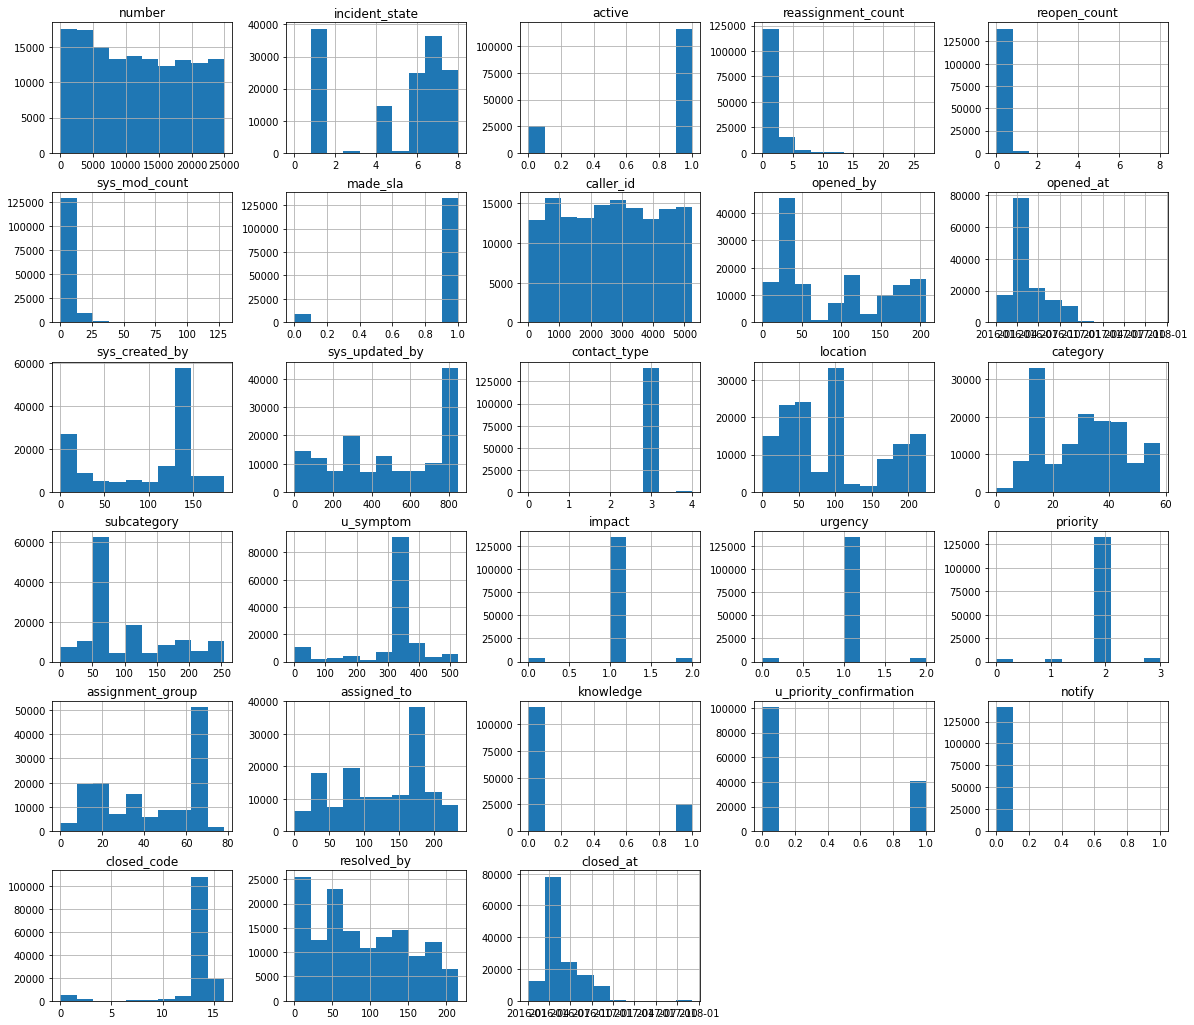

In [ ]:
###Histogram 
data2.hist(figsize=(20 , 18))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


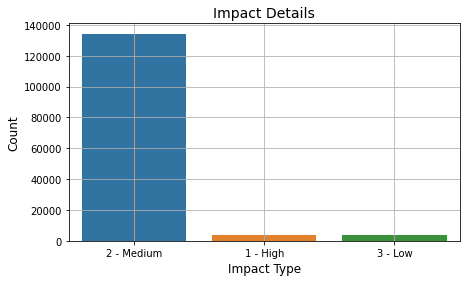

1    134335
2      3886
0      3491
Name: impact, dtype: int64

In [ ]:
# 'impact' - This a very important field as based on this a service company calculates profit or penalty
# This plays a major role in our Incident resolution time as well
fig_dims = (7, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data['impact'],ax=ax)
plt.title("Impact Details", size = 14)
plt.xlabel("Impact Type", size=12)
plt.ylabel("Count", size=12)
#plt.xticks(rotation=90)
plt.grid()
plt.show()
data2['impact'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


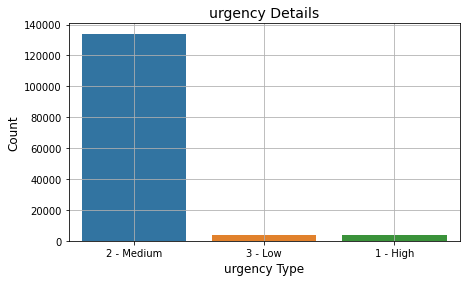

1    134094
0      4020
2      3598
Name: urgency, dtype: int64

In [ ]:
# 'urgency' - This a very important field as based which the ticket is being handled
# This plays a major role in our Incident resolution time as well
fig_dims = (7, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data['urgency'],ax=ax)
plt.title("urgency Details", size = 14)
plt.xlabel("urgency Type", size=12)
plt.ylabel("Count", size=12)
plt.grid()
plt.show()
data2['urgency'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


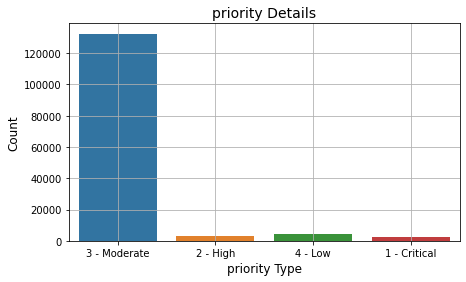

2    132452
3      4030
1      2972
0      2258
Name: priority, dtype: int64

In [ ]:
# ''priority' - Combination of both Impact and urgency
# This plays a major role in our Incident resolution time as well
fig_dims = (7, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data['priority'],ax=ax)
plt.title("priority Details", size = 14)
plt.xlabel("priority Type", size=12)
plt.ylabel("Count", size=12)
#plt.xticks(rotation=90)
plt.grid()
plt.show()
data2['priority'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


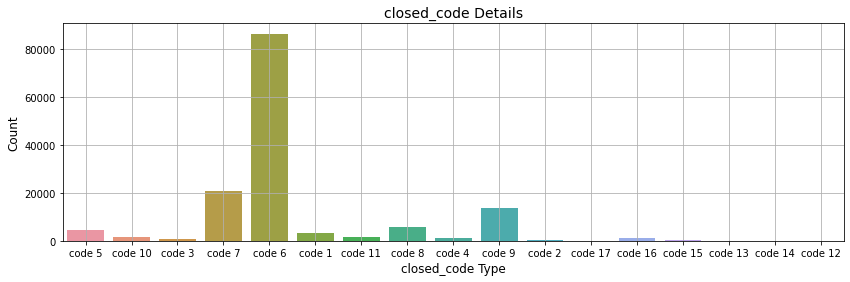

13    87297
14    20733
16    13562
15     5646
12     4469
0      3265
1      1678
2      1493
11     1139
7      1091
10      608
9       349
6       183
8       115
4        59
3        13
5        12
Name: closed_code, dtype: int64

In [ ]:
# Incident closure details
fig_dims = (14, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data['closed_code'],ax=ax)
plt.title("closed_code Details", size = 14)
plt.xlabel("closed_code Type", size=12)
plt.ylabel("Count", size=12)
plt.grid()
plt.show()
data2['closed_code'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


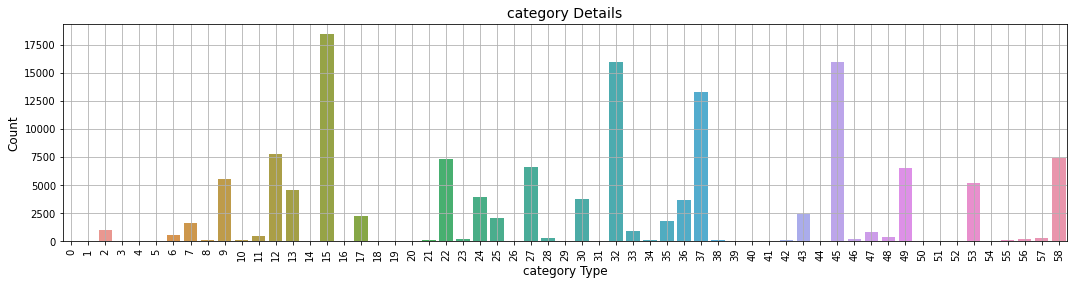

In [ ]:
# 'category'
fig_dims = (18, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data2['category'],ax=ax)
plt.title("category Details", size = 14)
plt.xlabel("category Type", size=12)
plt.ylabel("Count", size=12)
plt.xticks(rotation=90)
plt.grid()
plt.show()

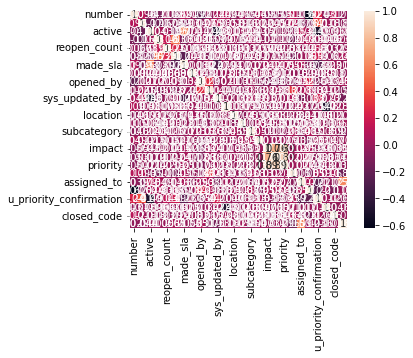

In [ ]:
fig_dims = (15, 15)
corr = data2.corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

# Create seperate columns for day , date & year to perform feature selection

In [ ]:
data2["opened_at_day"]=pd.to_datetime(data2.opened_at).dt.day
data2["opened_at_month"]=pd.to_datetime(data2.opened_at).dt.month
data2["opened_at_year"]=pd.to_datetime(data2.opened_at).dt.year
data2["opened_at_hr"]=pd.to_datetime(data2.opened_at).dt.hour
data2["opened_at_minute"]=pd.to_datetime(data2.opened_at).dt.minute

data2["closed_at_day"]=pd.to_datetime(data2.closed_at).dt.day
data2["closed_at_month"]=pd.to_datetime(data2.closed_at).dt.month
data2["closed_at_year"]=pd.to_datetime(data2.closed_at).dt.year
data2["closed_at_hr"]=pd.to_datetime(data2.closed_at).dt.hour
data2["closed_at_minute"]=pd.to_datetime(data2.closed_at).dt.minute

In [ ]:
data2.drop(['opened_at','closed_at'],axis=1,inplace=True)

In [ ]:
data2.drop(['sys_updated_at'],axis=1,inplace=True)

In [ ]:
data2.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,sys_created_by,...,opened_at_day,opened_at_month,opened_at_year,opened_at_hr,opened_at_minute,closed_at_day,closed_at_month,closed_at_year,closed_at_hr,closed_at_minute
0,0,7,1,0,0,0,1,1462,200,152,...,29,2,2016,1,16,3,5,2016,12,0
1,0,8,1,0,0,2,1,1462,200,152,...,29,2,2016,1,16,3,5,2016,12,0
2,0,8,1,0,0,3,1,1462,200,152,...,29,2,2016,1,16,3,5,2016,12,0
3,0,6,0,0,0,4,1,1462,200,152,...,29,2,2016,1,16,3,5,2016,12,0
4,1,7,1,0,0,0,1,1462,120,58,...,29,2,2016,4,40,3,6,2016,10,0


# Spliting the data into X & Y variables

In [ ]:
x = data2.drop('impact',axis=1)

In [ ]:
y = data2['impact']

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: impact, dtype: int64

# Train and Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=10)

# Balancing The Data

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_train_smote,y_train_smote = sm.fit_resample(x_train.astype('float'),y_train)

In [ ]:
from collections import Counter
print("Before SMOTE :",Counter(y_train))
print("After SMOTE :",Counter(y_train_smote))

Before SMOTE : Counter({1: 94076, 2: 2714, 0: 2408})
After SMOTE : Counter({1: 94076, 2: 94076, 0: 94076})


# Feature selection

# Feature selection using Chi-Square

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
ordered_rank_feature=SelectKBest(score_func=chi2,k=16)
ordered_feature=ordered_rank_feature.fit(x_train_smote,y_train_smote)
ordered_feature

SelectKBest(k=16, score_func=<function chi2 at 0x7ff06fc86320>)

In [ ]:
df_scores=pd.DataFrame(ordered_feature.scores_,columns=['scores'])
df_columns=pd.DataFrame(x_train.columns)
features_rank=pd.concat([df_scores,df_columns],axis=1)
features_rank.nlargest(10,'scores')

#These are top 10 features useful for predicting impact

,scores,0
0,5.489010e+07,number
8,1.489334e+06,opened_by
9,2.501975e+05,sys_created_by
10,2.350332e+05,sys_updated_by
17,1.893693e+05,priority
16,1.033814e+05,urgency
24,8.445939e+04,resolved_by
34,7.385006e+04,closed_at_minute
19,6.908591e+04,assigned_to
7,3.684925e+04,caller_id


# Feature selection using ExtraTreeClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x_train_smote,y_train_smote)

ExtraTreesClassifier()

In [ ]:
model.feature_importances_

array([1.13402299e-02, 8.77396755e-03, 1.04300280e-02, 4.14150903e-03,
       6.48250015e-04, 3.04824176e-03, 8.70754266e-03, 6.13888882e-03,
       2.91869491e-02, 1.96645238e-02, 5.57114329e-03, 4.00123449e-04,
       5.77348230e-03, 8.85316203e-03, 5.87277935e-03, 4.52771629e-03,
       2.78947928e-01, 4.77329527e-01, 6.48064696e-03, 6.94699418e-03,
       1.25660000e-02, 1.43916912e-02, 6.77758351e-06, 4.61747817e-03,
       9.98206581e-03, 5.53318051e-03, 6.32005186e-03, 4.97107035e-04,
       1.42535640e-02, 4.37757046e-03, 6.01814275e-03, 5.16553003e-03,
       5.29432205e-04, 6.34769080e-03, 6.61008426e-03])

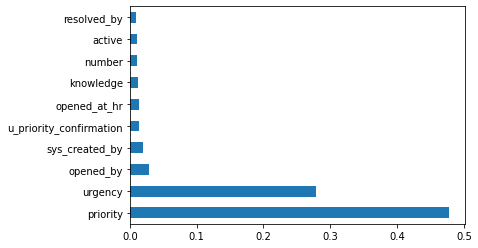

In [ ]:
ranked_features=pd.Series(model.feature_importances_,index=x_train.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

# Feature selection using DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model= DecisionTreeClassifier()
model.fit(x_train_smote,y_train_smote)

DecisionTreeClassifier()

In [ ]:
feature = pd.Series(model.feature_importances_)
feature.index = x_train.columns
feature.sort_values(ascending=False)

priority                   9.840467e-01
urgency                    1.472182e-02
subcategory                3.659656e-04
opened_at_minute           2.622567e-04
opened_by                  1.286016e-04
reassignment_count         7.935831e-05
number                     6.334643e-05
caller_id                  5.996749e-05
sys_mod_count              5.560596e-05
closed_at_hr               5.219501e-05
resolved_by                4.159449e-05
closed_at_month            3.765952e-05
u_symptom                  3.156591e-05
assigned_to                2.118363e-05
sys_created_by             1.613231e-05
closed_at_minute           9.448625e-06
made_sla                   5.314852e-06
incident_state             4.754489e-07
closed_code                3.156058e-07
opened_at_hr               3.115015e-07
active                     2.247796e-07
reopen_count               0.000000e+00
opened_at_year             0.000000e+00
sys_updated_by             0.000000e+00
closed_at_year             0.000000e+00


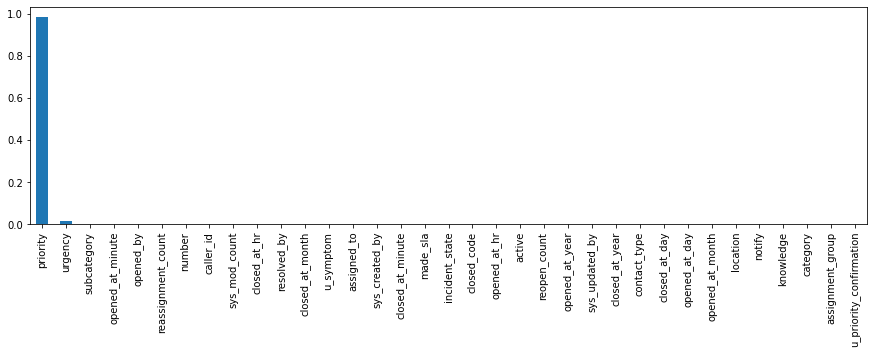

In [ ]:
feature.sort_values(ascending=False).plot.bar(figsize=(15, 4))

# Feature Selection using Mutual information

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(x_train_smote, y_train_smote)
mutual_info

array([0.69756896, 0.25433643, 0.0897336 , 0.16334814, 0.00441391,
       0.48281861, 0.07156298, 0.6059002 , 0.48801334, 0.33744197,
       0.38062498, 0.02710254, 0.1913954 , 0.2565438 , 0.27170981,
       0.22969134, 0.76309701, 1.09222501, 0.33296231, 0.37495796,
       0.02815654, 0.10029859, 0.        , 0.09218413, 0.37462877,
       0.08564389, 0.04691668, 0.01622869, 0.18738116, 0.17657066,
       0.10773913, 0.08622599, 0.01582522, 0.15443244, 0.08050642])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

priority                   1.092225
urgency                    0.763097
number                     0.697569
caller_id                  0.605900
opened_by                  0.488013
sys_mod_count              0.482819
sys_updated_by             0.380625
assigned_to                0.374958
resolved_by                0.374629
sys_created_by             0.337442
assignment_group           0.332962
subcategory                0.271710
category                   0.256544
incident_state             0.254336
u_symptom                  0.229691
location                   0.191395
opened_at_hr               0.187381
opened_at_minute           0.176571
reassignment_count         0.163348
closed_at_hr               0.154432
closed_at_day              0.107739
u_priority_confirmation    0.100299
closed_code                0.092184
active                     0.089734
closed_at_month            0.086226
opened_at_day              0.085644
closed_at_minute           0.080506
made_sla                   0

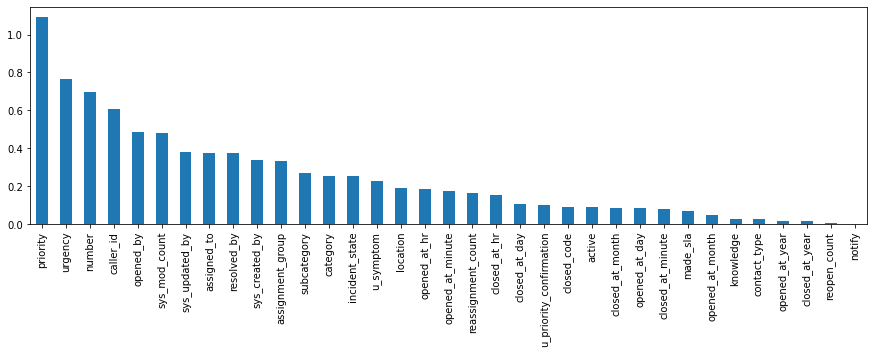

In [ ]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15, 4))

# Using important features which have been obtained after feature selection

In [ ]:
x_train_smote_new= x_train_smote[['priority','urgency','number','caller_id','opened_by','sys_mod_count','sys_updated_by','assigned_to','resolved_by','sys_created_by']]
x_test_new= x_test[['priority','urgency','number','caller_id','opened_by','sys_mod_count','sys_updated_by','assigned_to','resolved_by','sys_created_by']]

In [ ]:
#priority                   1.092273
#urgency                    0.763277
#number                     0.697298
#caller_id                  0.605181
#opened_by                  0.486503
#sys_mod_count              0.483351
#sys_updated_by             0.380200
#assigned_to                0.376061
#resolved_by                0.372394
#sys_created_by  

# Model Validation Methods

# KNN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=17)

results = cross_val_score(model, x_train_smote_new, y_train_smote, cv=kfold)

print(results.mean())

0.9112850291582081


In [ ]:
model.fit(x_train_smote_new,y_train_smote)

KNeighborsClassifier(n_neighbors=17)

In [ ]:
# Predicting the model
y_predict_knn = model.predict(x_test_new)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_knn))
print(classification_report(y_test,y_predict_knn))

0.818765583102037
              precision    recall  f1-score   support

           0       0.20      0.87      0.32      1083
           1       0.99      0.82      0.90     40259
           2       0.22      0.90      0.36      1172

    accuracy                           0.82     42514
   macro avg       0.47      0.86      0.52     42514
weighted avg       0.95      0.82      0.87     42514



In [ ]:
print(confusion_matrix(y_test,y_predict_knn ))

[[  944   116    23]
 [ 3812 32814  3633]
 [   27    94  1051]]


In [ ]:
accuracy_knn = results.mean()*100

In [ ]:
accuracy_knn

91.1285029158208

# Gaussian Naive Bayes Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB

kfold = KFold(n_splits=10)
model = GaussianNB()
results = cross_val_score(model, x_train_smote_new, y_train_smote, cv=kfold)
print(results.mean())

0.9931615666116105


In [ ]:
model.fit(x_train_smote_new,y_train_smote)

GaussianNB()

In [ ]:
# Predicting the model
y_predict_NB = model.predict(x_test_new)

In [ ]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_NB))
print(classification_report(y_test,y_predict_NB))

0.9868043468034059
              precision    recall  f1-score   support

           0       0.68      1.00      0.81      1083
           1       1.00      0.99      0.99     40259
           2       0.96      0.99      0.97      1172

    accuracy                           0.99     42514
   macro avg       0.88      0.99      0.93     42514
weighted avg       0.99      0.99      0.99     42514



In [ ]:
confusion_matrix(y_test,y_predict_NB )

array([[ 1080,     3,     0],
       [  496, 39709,    54],
       [    5,     3,  1164]])

In [ ]:
accuracy_NB = results.mean()*100

In [ ]:
accuracy_NB

99.31615666116105

# RandomForestClassification

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

kfold = KFold(n_splits=10)
model = RandomForestClassifier()
results = cross_val_score(model, x_train_smote_new, y_train_smote, cv=kfold)
print(results.mean())

0.9999326788951091


In [ ]:
model.fit(x_train_smote_new,y_train_smote)

RandomForestClassifier()

In [ ]:
# Predicting the model
y_predict_rf = model.predict(x_test_new)

In [ ]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

0.9999529566730959
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1083
           1       1.00      1.00      1.00     40259
           2       1.00      1.00      1.00      1172

    accuracy                           1.00     42514
   macro avg       1.00      1.00      1.00     42514
weighted avg       1.00      1.00      1.00     42514



In [ ]:
accuracy_rf = results.mean()*100

In [ ]:
accuracy_rf

99.9932678895109

# DecissionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kfold = KFold(n_splits=10)
model = DecisionTreeClassifier()
results = cross_val_score(model, x_train_smote_new, y_train_smote, cv=kfold)
print(results.mean())

0.999883073209675


In [ ]:
model.fit(x_train_smote_new,y_train_smote)

DecisionTreeClassifier()

In [ ]:
# Predicting the model
y_predict_dtree = model.predict(x_test_new)

In [ ]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_dtree))
print(classification_report(y_test,y_predict_dtree))

0.9999529566730959
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1083
           1       1.00      1.00      1.00     40259
           2       1.00      1.00      1.00      1172

    accuracy                           1.00     42514
   macro avg       1.00      1.00      1.00     42514
weighted avg       1.00      1.00      1.00     42514



In [ ]:
accuracy_dtree = results.mean()*100

In [ ]:
accuracy_dtree

99.9883073209675

In [ ]:
data = {"MODEL":pd.Series(["Random forest","Decision tree","Gaussian NB",'KNN']),
        "Accuracy":pd.Series([accuracy_rf,accuracy_dtree,accuracy_knn,accuracy_NB])}
table=pd.DataFrame(data)
table

,MODEL,Accuracy
0,Random forest,99.993268
1,Decision tree,99.988307
2,Gaussian NB,91.128503
3,KNN,99.316157


# Impact prediction using Random forest model showed the highest accuracy and f1-score. Therefore, this model is used for deployment to predict the impact of the incidents. (High,Medium and Low)

# **Save MI Model**



In [ ]:
pip install xgboost

In [ ]:
from sklearn.preprocessing import StandardScaler
